In [1]:
from sklearn.metrics import classification_report
import pandas as pd
import pickle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
# Import data
data = pd.read_csv('data/data_train_diabetes_health_indicators.csv')
data = data.drop('Unnamed: 0', axis=1)
data['Diabetes_012'] = data['Diabetes_012'].astype(int)
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split data into train and test
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# Analyse data

In [10]:
data 

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,2,1,1.0,1,32.0,1.0,0.0,1.0,1,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,0,0,1.0,1,28.0,0.0,0.0,0.0,0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,0,0,1.0,1,24.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,2,1,1.0,1,38.0,0.0,0.0,0.0,1,0,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,0,0,1.0,1,30.0,0.0,0.0,0.0,0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47271,0,0,0.0,1,27.0,1.0,0.0,0.0,1,1,...,1,0.0,3.0,0.0,0.0,0.0,0,11,6.0,9.0
47272,2,1,0.0,1,26.0,0.0,0.0,0.0,0,1,...,1,0.0,3.0,0.0,0.0,0.0,1,12,6.0,9.0
47273,0,1,0.0,0,32.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,0.0,0.0,0.0,1,6,5.0,9.0
47274,0,1,1.0,1,30.0,0.0,0.0,0.0,1,0,...,1,0.0,2.0,0.0,0.0,0.0,1,8,6.0,9.0


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_resampled)
parametres = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

modelo_svm = SVC(kernel='rbf')
grid_search = GridSearchCV(modelo_svm, parametres, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_resampled)
print(grid_search.best_params_)
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

{'C': 1, 'gamma': 0.01}


In [12]:
matrice_confusion = confusion_matrix(y_test_resampled, y_pred)
print("Matrice de Confusion:")
print(matrice_confusion)

Matrice de Confusion:
[[152  54  41]
 [ 54  56  85]
 [ 29  51 126]]


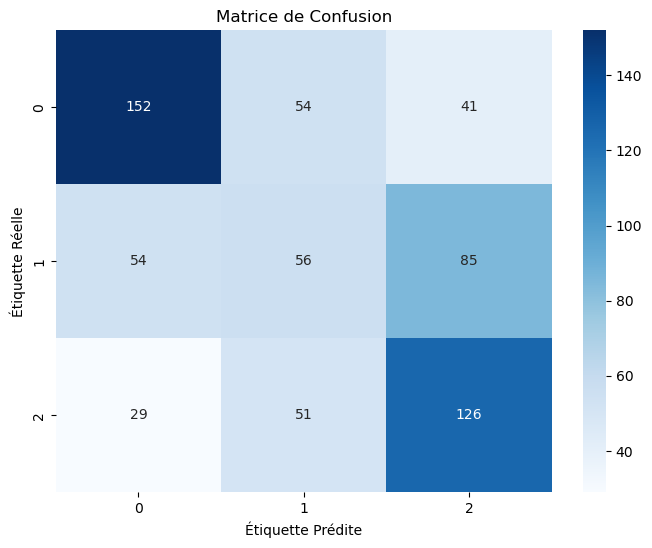

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_confusion, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion")
plt.xlabel("Étiquette Prédite")
plt.ylabel("Étiquette Réelle")
plt.show()

In [14]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test_resampled, y_pred, average='weighted')
recall = recall_score(y_test_resampled, y_pred, average='weighted')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Precision: 0.5101663411792922
Recall: 0.5154320987654321


In [15]:
import pickle 
with open("classification_model_svm.pkl", "wb") as fichier:
    pickle.dump(grid_search, fichier)
